# 자동차 리콜 데이터 분석하기

## 1. 데이터 읽기

### 1.1 데이터 불러오기

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install missingno
import missingno as msno

In [67]:
df = pd.read_csv("./data/한국교통안전공단_자동차결함 리콜현황_20201231.csv", encoding="euc-kr")

In [68]:
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [69]:
df.head(10)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
5,만트럭버스코리아(주),TGS 카고,2016-04-11,2016-07-21,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
6,만트럭버스코리아(주),TGS 카고,2016-04-29,2016-04-29,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
7,만트럭버스코리아(주),TGS 카고,2015-03-25,2016-04-01,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
8,만트럭버스코리아(주),TGX 트랙터,2015-03-25,2016-07-04,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
9,만트럭버스코리아(주),TGX 트랙터,2015-05-05,2016-09-15,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...


In [70]:
df.tail()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


## 2. 데이터 정제

### 2.1 결측치 확인

In [72]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

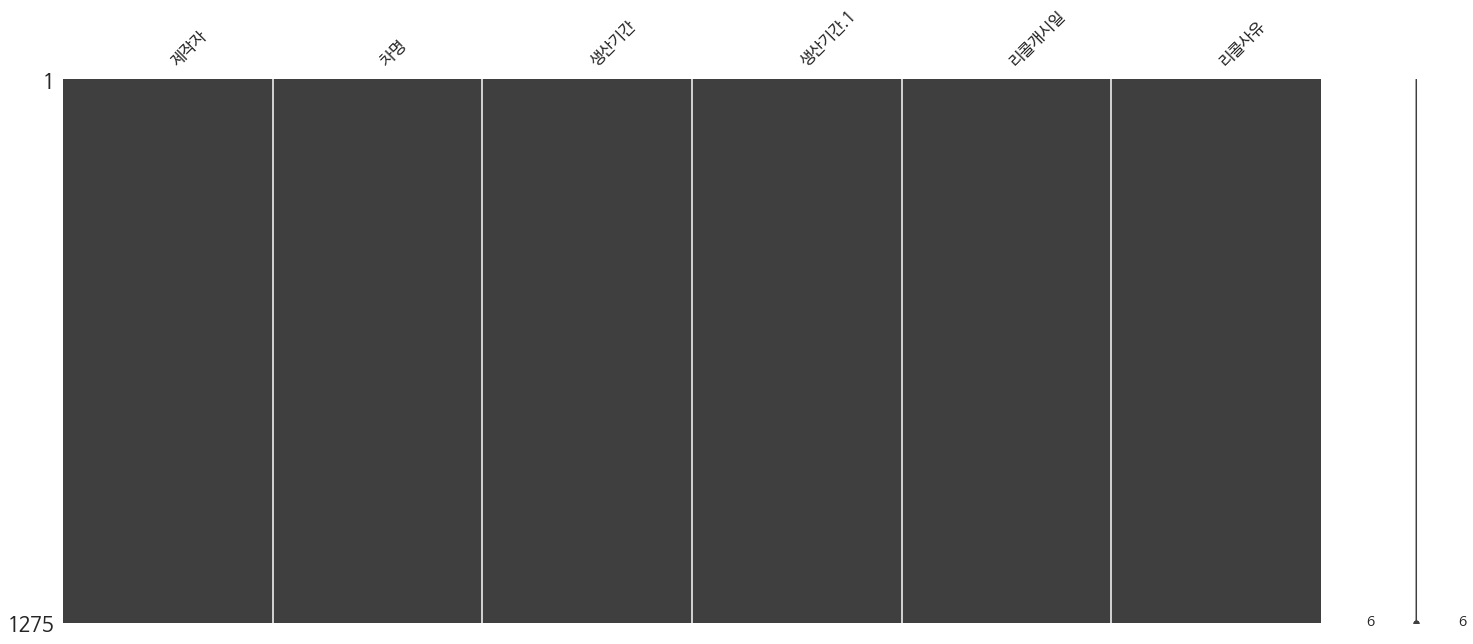

In [73]:
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df)
plt.show()

In [74]:
df.isna().sum()

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

### 2.2 중복값 확인

In [75]:
df[df.duplicated(keep = False)]
# duplicated(keep = first, last, false)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


In [76]:
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 1275
After: 1274


### 2.3 기초적인 데이터 변형

#### 생산기간, 생산기간.1, 리콜 개시일을 정수형으로 변형

In [77]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

df['start_year'] = df['생산기간'].apply(parse_year)
df['start_month'] = df['생산기간'].apply(parse_month)
df['start_day'] = df['생산기간'].apply(parse_day)

df['end_year'] = df['생산기간.1'].apply(parse_year)
df['end_month'] = df['생산기간.1'].apply(parse_month)
df['end_day'] = df['생산기간.1'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


In [78]:
df = df.drop(columns = ["생산기간", "생산기간.1", "리콜개시일"]).rename(columns={'제작자': "manufacturer", "차명": "model", "리콜사유": "cause"})

In [79]:
df.head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


In [80]:
df.recall_year.min(), df.recall_year.max()

(2019, 2020)

In [81]:
df = df[df["recall_year"]==2020]
len(df)

1263

## 3. 데이터 시각화

### 3.1 제조사별 리콜 현황 출력

In [82]:
df.head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,9,4,2020,1,23


In [83]:
df.groupby("manufacturer").count()['model'].sort_values(ascending=False)

manufacturer
비엠더블유코리아(주)           526
메르세데스벤츠코리아(주)         234
아우디폭스바겐코리아(주)         115
한불모터스(주)               71
한국토요타자동차(주)            54
(주)볼보자동차코리아            39
현대자동차(주)               28
기아자동차(주)               19
(주) 한국모터트레이딩           16
한국지엠주식회사               15
포드세일즈서비스코리아(유)         14
화창상사(주)                14
다임러트럭코리아(주)            13
(주) 바이크코리아             12
만트럭버스코리아(주)            11
혼다코리아(주)               10
(주)에프엠케이                9
에프씨에이코리아(주)             7
(주)재규어랜드로버코리아           7
한국닛산(주)                 7
대전기계공업(주)               6
르노삼성자동차(주)              6
포르쉐코리아 주식회사             5
유한회사 모토로싸               4
(주)스포츠모터사이클코리아          4
기흥인터내셔널 유한회사            4
허스크바나모터싸이클코리아 주식회사      3
쌍용자동차(주)                3
(주)에이비케이                2
(주) 다빈월드                1
지엠아시아퍼시픽지역본부 주식회사       1
아이씨피(주)                 1
(주)스즈키씨엠씨               1
스카니아코리아그룹(주)            1
Name: model, dtype: int64

In [84]:
tmp = pd.DataFrame(df.groupby('manufacturer').count()['model'].sort_values(ascending = False)).rename(columns={"model":"count"})

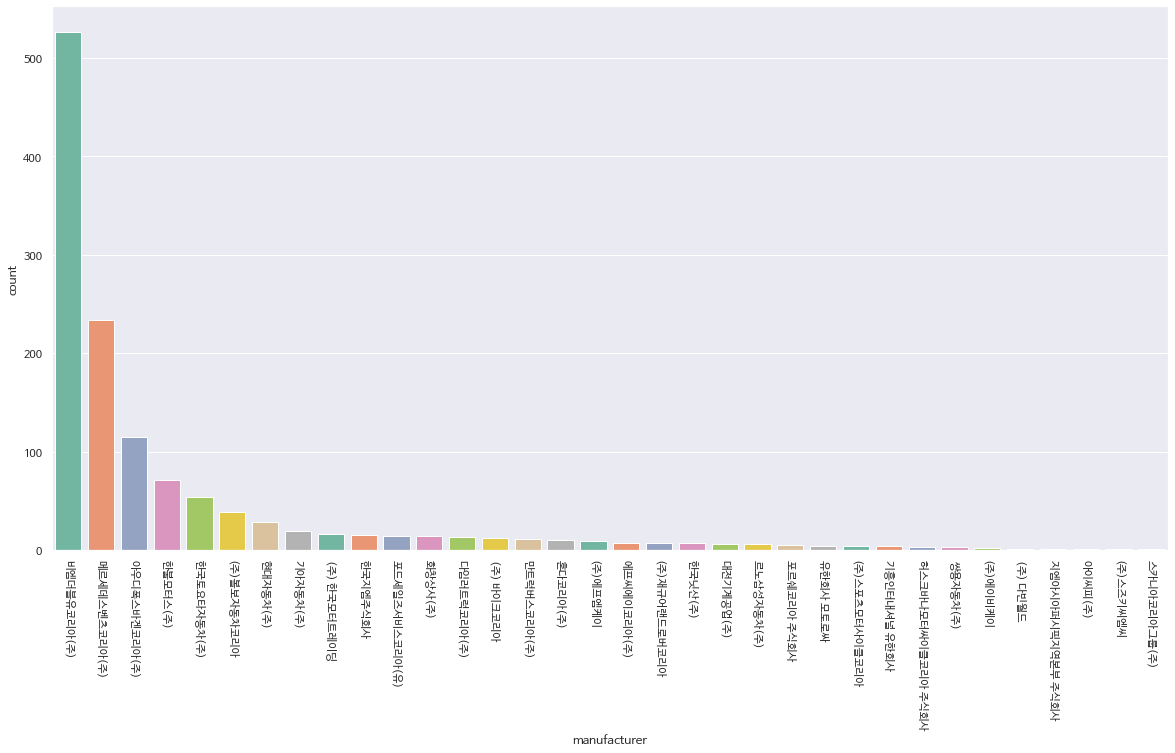

In [85]:
plt.figure(figsize=(20,10))

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

In [86]:
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '기아자동차(주)', '(주) 한국모터트레이딩',
       '한국지엠주식회사', '포드세일즈서비스코리아(유)', '화창상사(주)', '다임러트럭코리아(주)', '(주) 바이크코리아',
       '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '에프씨에이코리아(주)', '(주)재규어랜드로버코리아',
       '한국닛산(주)', '대전기계공업(주)', '르노삼성자동차(주)', '포르쉐코리아 주식회사', '유한회사 모토로싸',
       '(주)스포츠모터사이클코리아', '기흥인터내셔널 유한회사', '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)',
       '(주)에이비케이', '(주) 다빈월드', '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨',
       '스카니아코리아그룹(주)'],
      dtype='object', name='manufacturer')

### 3.2 모델별 리콜 현황

In [87]:
pd.DataFrame(df.groupby("model").count()["start_year"].sort_values(ascending=False)).rename(columns = {"start_year":"columns"}).head(10)

,columns
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW 320d xDrive Gran Turismo,8
BMW X5 xDrive30d,8


In [88]:
tmp = pd.DataFrame(df.groupby("model").count()["manufacturer"].sort_values(ascending=False))

# .iloc[:50] --> 상위 50개의 모델
tmp = tmp.rename(columns={"manufacturer": "count"}).iloc[:50]

In [89]:
tmp.index

Index(['BMW 320d', 'BMW 520d', 'BMW X3 xDrive20d', 'BMW 520d xDrive',
       'BMW 320d Gran Turismo', 'BMW X6 xDrive30d', 'MINI Cooper D',
       'BMW 320d xDrive Gran Turismo', 'BMW X5 xDrive30d', '3세대 뉴 스프린터',
       'BMW X6 M50d', 'MINI Cooper D Countryman', 'DS3 Crossback 1.5 BlueHDi',
       'MINI Cooper SD Countryman ALL4', 'BMW 420d Gran Coupe', 'BMW 118d',
       'BMW X4 xDrive20d', 'BMW 325Ci', 'S60',
       'BMW 320d EfficientDynamics Edition', 'BMW 120d', 'BMW 525d xDrive',
       'BMW 325i', 'MINI Cooper D Countryman ALL4', 'BMW 730d xDrive',
       'BMW 330Ci', 'MINI Cooper SD', 'BMW 420d Coupe',
       'BMW 420d xDrive Gran Coupe', 'AMG GLC 43 4MATIC', 'BMW X3 xDrive30d',
       'BMW X6 xDrive40d', 'C 200', 'BMW 525d', 'XC60', 'BMW 220d Coupe',
       'BMW Gran Turismo 30d xDrive', 'BMW 318i', 'BMW X1 xDrive20d',
       'BMW X1 xDrive18d', 'BMW 320d Touring', 'BMW 320i', 'V60', 'BMW 323i',
       'BMW Gran Turismo 30d', 'BMW Active Tourer', 'BMW 740d xDrive',
       'BMW 

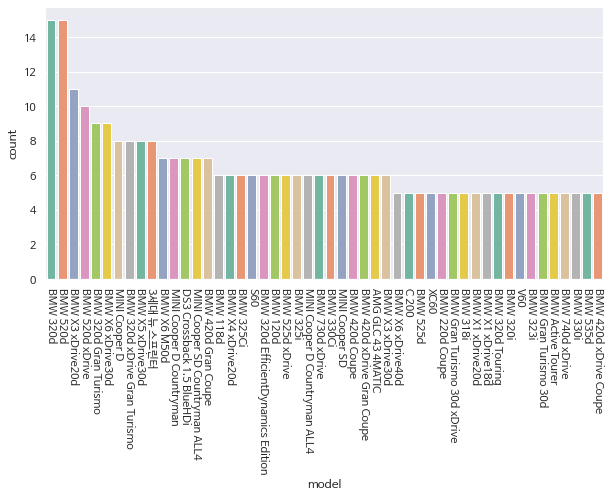

In [90]:
plt.figure(figsize=(10,5))

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

### 3.3 월별 리콜 현황 출력

In [91]:
pd.DataFrame(df.groupby('recall_month').count()['start_year'].sort_values(ascending=False)).rename(columns = {"start_year":"count"})

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
3,108
2,107
9,72
5,68


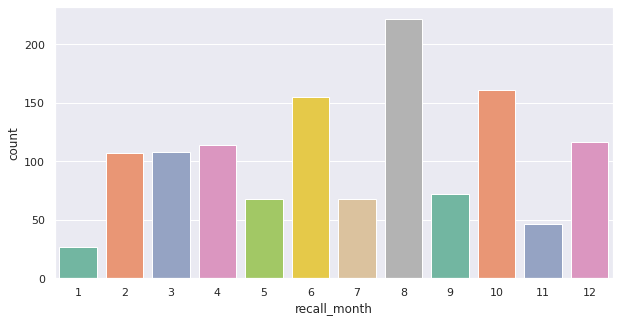

In [92]:
plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
ax = sns.countplot(x="recall_month", data=df, palette="Set2")
plt.show()

### 3.4 생산연도별 리콜현황 출력

In [93]:
tmp = pd.DataFrame(df.groupby('start_year').count()['model']).rename(columns={"model":"count"}).reset_index()
tmp.head()

,start_year,count
0,1998,8
1,1999,10
2,2000,16
3,2001,21
4,2002,14


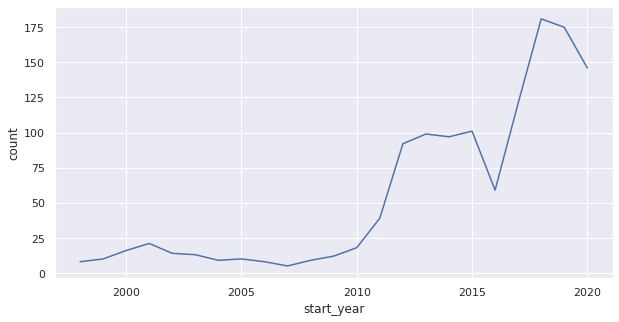

In [94]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.lineplot(data = tmp, x = "start_year", y = "count")
plt.show()

In [95]:
tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})
tmp

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
3,108
2,107
9,72
5,68


loc vs iloc
loc[0] -> 인덱스 이름이 0인 행을 추출
iloc[0] => 0번째 행에 있는 값들을 추출

In [96]:
tmp.iloc[0]["count"]-tmp.iloc[-1]["count"]

194

### 3.5 4분기 제조사별 리콜 현황 출력

In [97]:
# 2020년 4분기 제조사별 리콜 현황
df[df.recall_month.isin([10,11,12])].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
447,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1
451,비엠더블유코리아(주),BMW 320d EfficientDynamics Edition,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2011,11,8,2015,6,29,2020,10,1
455,비엠더블유코리아(주),BMW 320d Gran Turismo,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,26,2015,5,21,2020,10,1


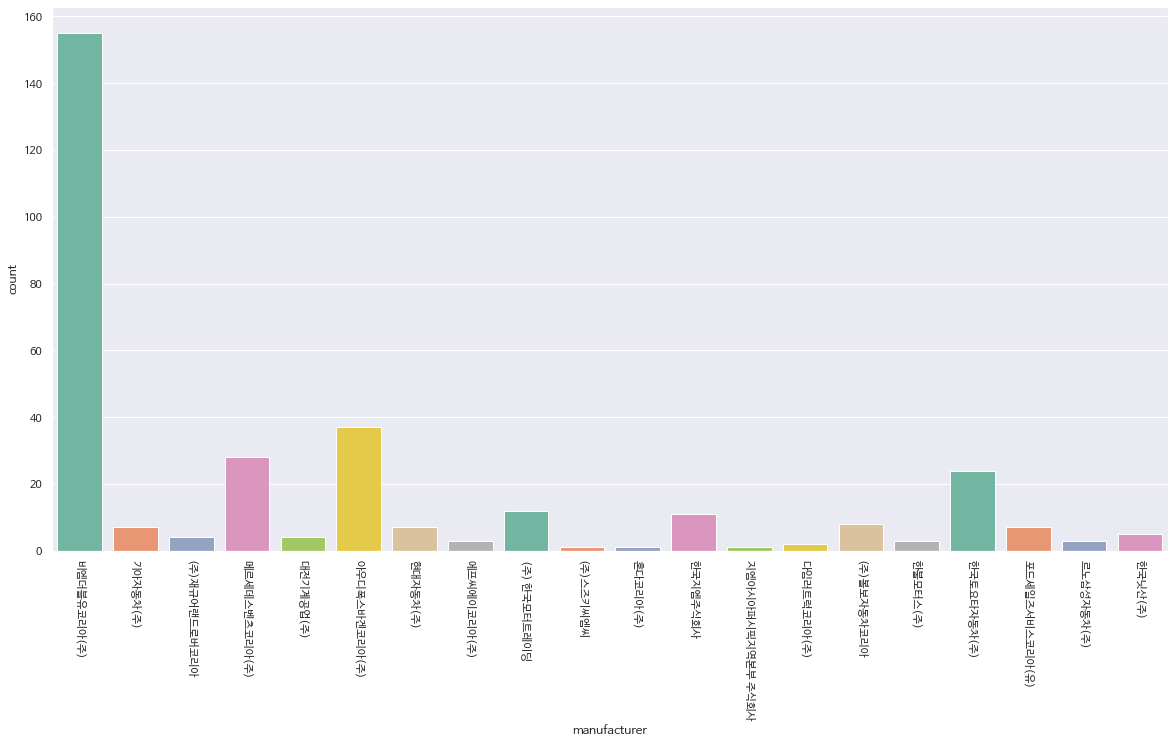

In [98]:
plt.figure(figsize = (20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x = "manufacturer", data =df[df.recall_month.isin([10,11,12])], palette = "Set2")
plt.xticks(rotation=270)  
plt.show()

### 3.6 하반기 생산연도별 리콜 현황 출력

In [99]:
df[df.recall_month>=7].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
437,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
441,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
445,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1


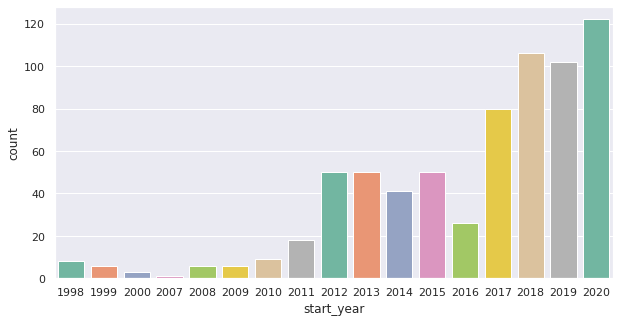

In [100]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")
plt.show()

### 3.7 워드클라우드를 이용한 리콜 사유 시각화

In [101]:
df.cause

0       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2       콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...
3       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
4       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
                              ...                        
1270                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
Name: cause, Length: 1263, dtype: object

In [107]:
!pip install wordcloud==1.8.2.2
from wordcloud import WordCloud, STOPWORDS

In [108]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [109]:
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [110]:
# 리콜 사유에 있는 열의 값들을 중복 제거한 뒤 모두 이어붙여 text라는 문자열로 저장
text = ""

for c in df.cause.drop_duplicates():
    text += c

text[:300]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가'

In [111]:
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [112]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [113]:
text = ""

for c in df.cause.drop_duplicates():
    text += c

text[:300]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가'

In [114]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'